<a href="https://colab.research.google.com/github/krimplessy/Machine_Learning/blob/main/Metrick_method_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h3>Выполнила студентка</h3>**

Воробьева Кристина

Группа: Б9120-09.03.04ПрогИн(3)

In [ ]:
# про запас подключим библиотеки
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np

from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin

from mlxtend.plotting import plot_decision_regions

import time
import datetime

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Файловый способ подключения выборки данных
#data = pd.read_csv('diabetes.csv', names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

file_path = "diabetes.csv"
data = pd.read_csv(file_path)

X = data.drop("Outcome", 1)
Y = data.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

Метод k-ближайших соседей (KNN):

K	 Обучение		 Контроль
1 	 1.0			 0.696969696969697
2 	 0.8379888268156425	 0.7489177489177489
3 	 0.8324022346368715	 0.7012987012987013
4 	 0.8100558659217877	 0.7272727272727273
5 	 0.7821229050279329	 0.7359307359307359
6 	 0.7746741154562383	 0.7619047619047619
7 	 0.7728119180633147	 0.7272727272727273
8 	 0.7653631284916201	 0.7186147186147186
9 	 0.7635009310986964	 0.7229437229437229
10 	 0.7821229050279329	 0.7489177489177489
11 	 0.7858472998137802	 0.7229437229437229
12 	 0.7895716945996276	 0.7359307359307359
13 	 0.7783985102420856	 0.70995670995671
14 	 0.7858472998137802	 0.7402597402597403
15 	 0.7746741154562383	 0.7229437229437229
16 	 0.7858472998137802	 0.7186147186147186
17 	 0.7802607076350093	 0.7316017316017316
18 	 0.776536312849162	 0.70995670995671
19 	 0.7783985102420856	 0.7272727272727273
Лучшее число соседей (k)   : 6
Процент ошибок на обучении : 22.532588454376167 %
Процент ошибок на контроле : 23.809523809523814 %


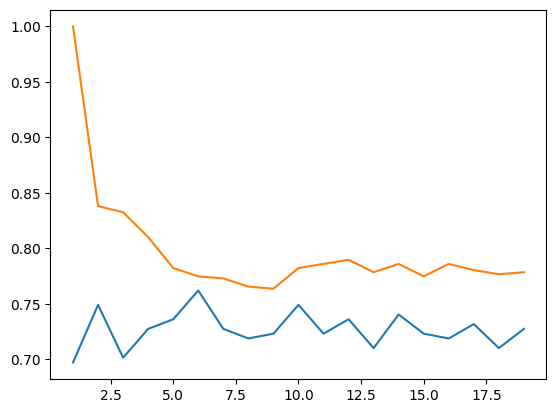

In [ ]:
# посмотрим как ведет себя наша модель, если количество соседей мы будем менять
print('K\t', 'Обучение\t\t', 'Контроль');

models = []
train_accuracy = []
test_accuracy = []
max_k = 20 # максимальное количество соседей
for n_neighbors in range(1, max_k):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)
    print(n_neighbors, '\t', model.score(X_train, Y_train), end = '')
    a = str(model.score(X_train, Y_train))
    if len(a) < 15:
        print('\t\t', end = '')
    print('\t', model.score(X_test, Y_test))
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test))
best_k = test_accuracy.index(max(test_accuracy)) + 1
print('Лучшее число соседей (k)   :', best_k)
print('Процент ошибок на обучении :', (1-train_accuracy[best_k - 1]) * 100, '%')
print('Процент ошибок на контроле :', (1-test_accuracy[best_k - 1]) * 100, '%')
plt.plot(range(1,max_k),test_accuracy);
plt.plot(range(1,max_k),train_accuracy);

**<h3>Вывод</h3>**

Метод k ближайших соседей (KNN).

*Суть метода.* Из выбранного датасета у нас выделяется обучающая выборка, где данные определены к какому-либо классу, по которой в дальнейшем мы будем классифицировать "тестовую" выборку.
Данный алгоритм по каким-то признакам считает расстояния между уже размеченными и еще неизвестными объектами в пространстве. Сначала вычисляется расстояние от объекта, который необходимо проклассифицировать, до каждого объекта из обучающей выборки с определенным классом. Затем отбираются объекты с минимальным расстоянием и объект классифицируется на основе наиболее часто встречающихся k-соседей

Процентное соотношение обучающих и контрольных объектов - 70% и 30%.

При random_state = 5 результаты эксперимента следующие:

  *Лучшее количество соседей:* 6

  *Процент ошибок на обучении:* 22.532588454376167 %

  *Процент ошибок на контроле:* 23.809523809523814 %

При random_state = 0:

*Лучшее число соседей:* 15

*Процент ошибок на обучении:* 21.22905027932961 %

*Процент ошибок на контроле:* 24.242424242424242 %

При random_state = 10:

*Лучшее число соседей:* 6

*Процент ошибок на обучении:* 19.18063314711359 %

*Процент ошибок на контроле:* 28.13852813852814 %

Процент ошибок на обучении находится в диапазоне - от 19% до 22%, а процент ошибок на контроле - от 23% до 28%.

Наилучшее количество соседей - 6, потому что встречается в выводах эксперимента чаще всего.